2024-12-12 12:13:29,228 - top2vec - INFO - Pre-processing documents for training
2024-12-12 12:13:29,238 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2024-12-12 12:13:31,827 - top2vec - INFO - Creating joint document/word embedding
2024-12-12 12:13:32,837 - top2vec - INFO - Creating lower dimension embedding of documents
2024-12-12 12:13:32,941 - top2vec - INFO - Finding dense areas of documents
2024-12-12 12:13:32,945 - top2vec - INFO - Finding topics


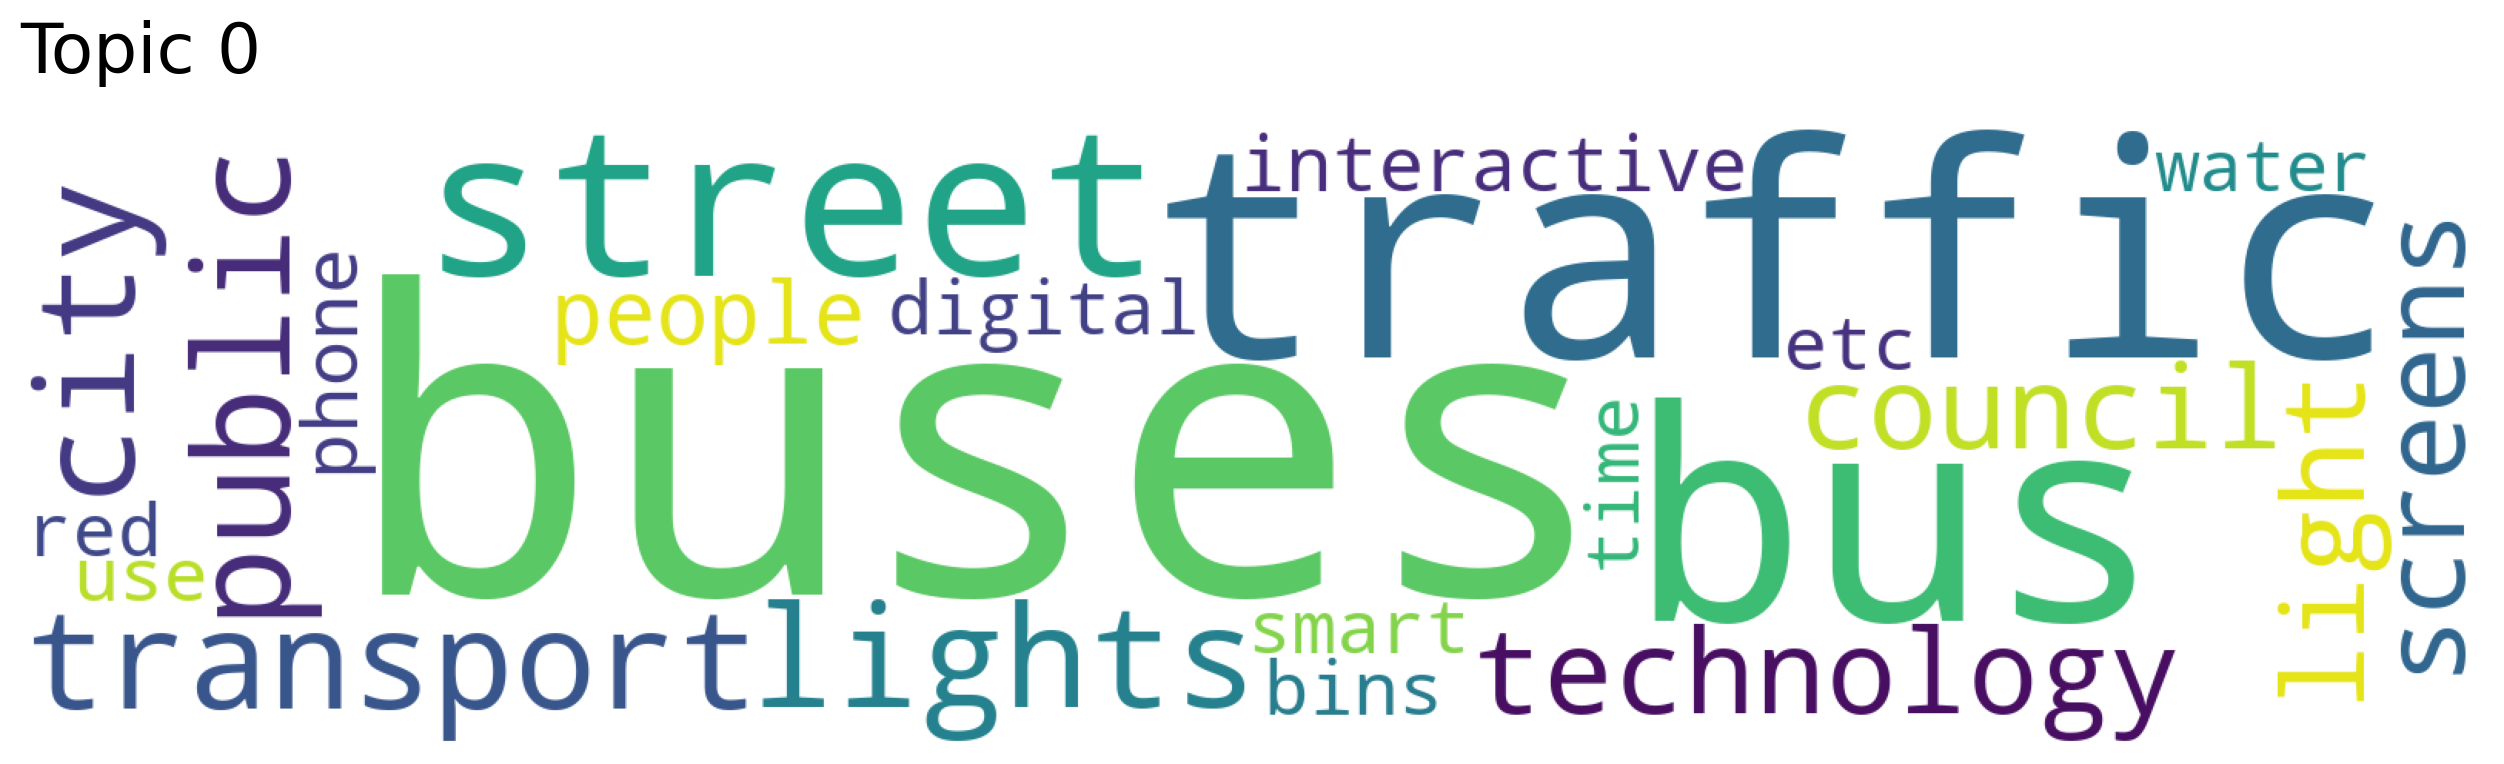

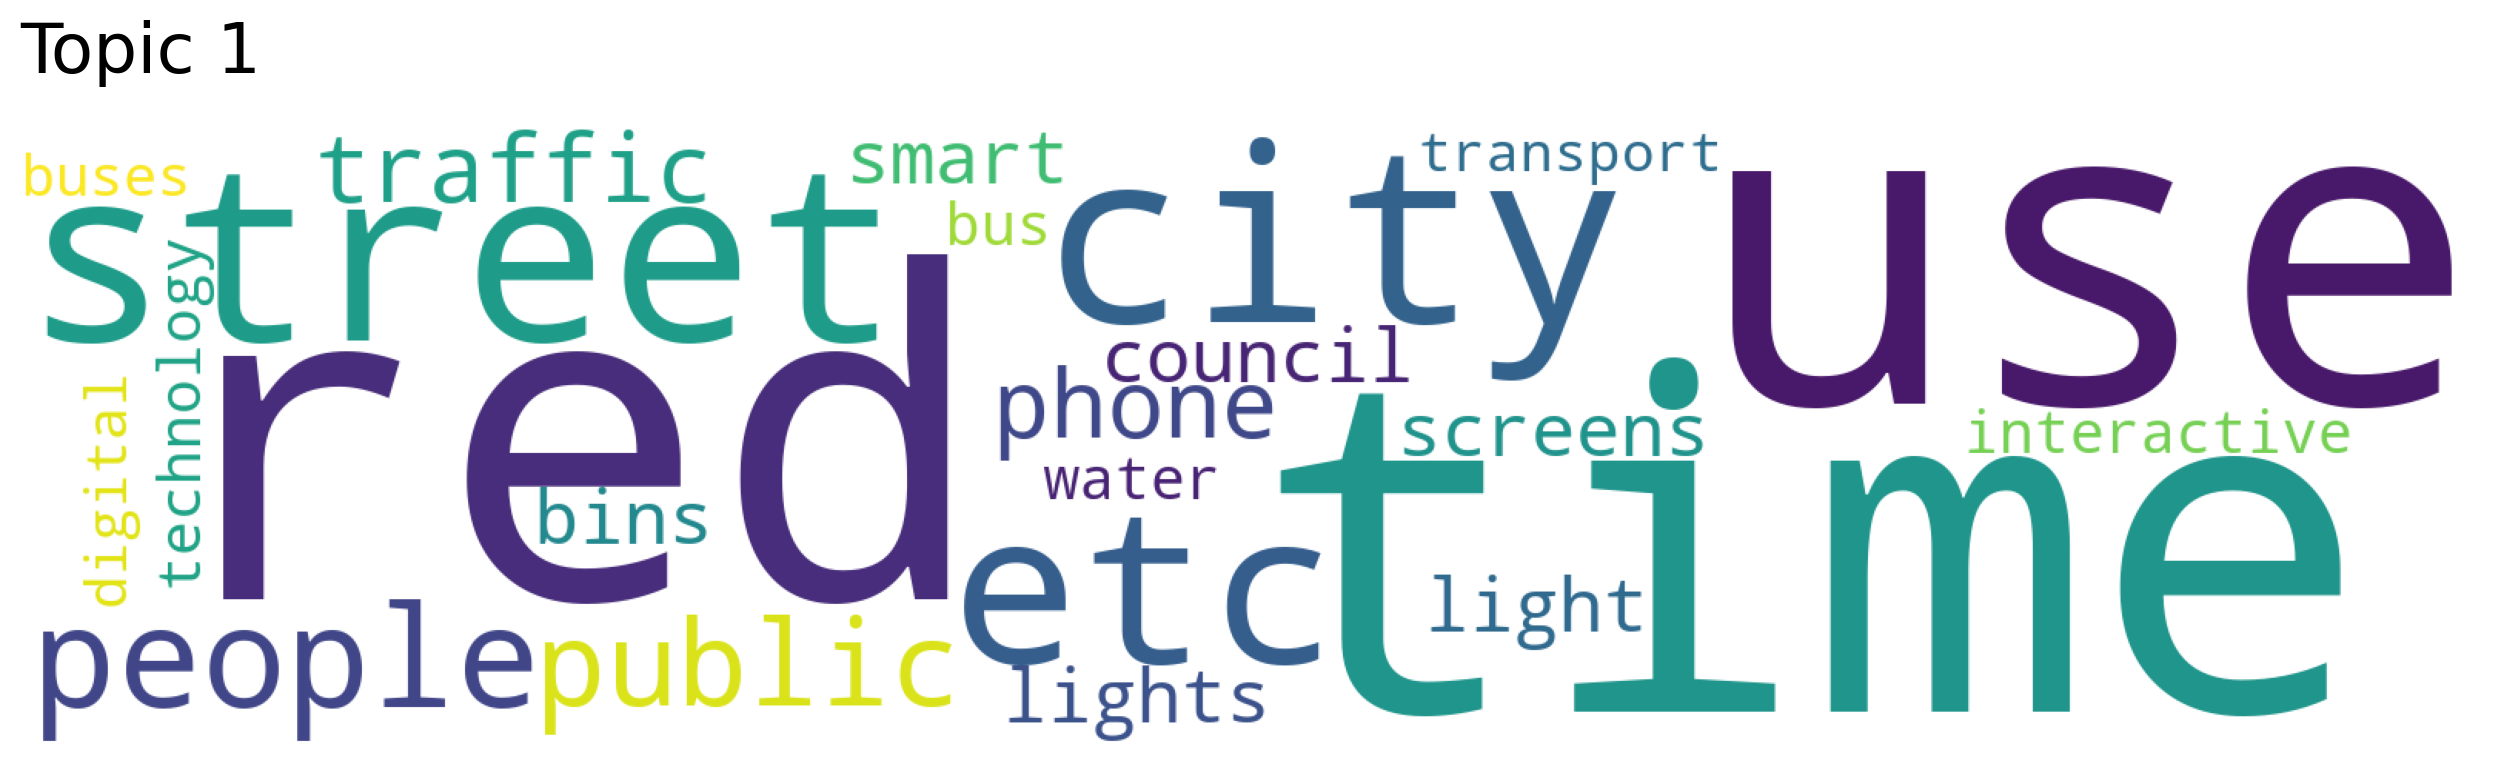

In [37]:
from matplotlib import pyplot as plt
from top2vec import Top2Vec
import spacy
import pandas as pd
import logging

# Disable all logging (INFO) from top2vec:
top2vec_logger = logging.getLogger("top2vec")
top2vec_logger.disabled = True

def preprocess_text(text):
    # Convert to lowercase and remove punctuation
    doc = nlp(text.lower())
    cleaned_text = " ".join([token.text for token in doc if token.text not in stop_words and not token.is_punct])
    return cleaned_text

def identify_themes(df, column):
    # Load spaCy's English tokenizer
    global nlp
    nlp = spacy.load("en_core_web_sm")

    # Get spaCy's list of stopwords
    global stop_words
    stop_words = nlp.Defaults.stop_words

    # Drop NaN values first and make a copy
    df_cleaned = df.dropna(subset=[column]).copy()

    # Apply preprocessing to the cleaned column
    df_cleaned['cleaned_response'] = df_cleaned[column].apply(preprocess_text)

    # Convert the column to a list and ensure all entries are strings
    cleaned_responses_list = df_cleaned['cleaned_response'].tolist()

    process_words(cleaned_responses_list) # Threading interrupts Jupyter visualisation, so cannot be run async

def process_words(cleaned_responses_list):
    # Find topics with more than 6 occurrences
    model = Top2Vec(cleaned_responses_list,
        speed="deep-learn",
        min_count=6)

    # Return only top 3 topics
    num_topics = min(model.get_num_topics(), 3)
    topic_words, word_scores, topic_nums = model.get_topics(num_topics)

    # Create a word cloud of related words for each topic
    for topic in topic_nums:
        model.generate_topic_wordcloud(topic, background_color="white")
        plt.show()

# df = pd.read_csv('data/all-responses.csv')
# identify_themes(df, 'Q23 - Do you have any ideas for new technology or examples you\'ve seen from other...')